In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import math
import random
from datetime import datetime, date, time

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn import cross_validation
from sklearn import feature_extraction
from sklearn.preprocessing import OneHotEncoder
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load the data, which is included in sklearn.
bike_sharing_demand = pd.read_csv('./data/input/train.csv')
prediction_data = pd.read_csv('./data/input/test.csv')
print bike_sharing_demand.shape

train_data, train_labels = bike_sharing_demand.ix[:, 'datetime':'windspeed'], bike_sharing_demand.ix[:, 'casual':]
prediction_data = prediction_data.ix[:, 'datetime':'windspeed']

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
mini_bike_sharing_demand = bike_sharing_demand.ix[shuffle[:100], :]
mini_train_data, mini_train_labels = train_data.ix[shuffle[:100], :], train_labels.ix[shuffle[:100], :]
print mini_train_data.shape, mini_train_labels.shape

print train_data.columns
print train_data.dtypes
print train_labels.columns
print train_labels.dtypes

(10886, 12)
(100, 9) (100, 3)
Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp', u'atemp', u'humidity', u'windspeed'], dtype='object')
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object
Index([u'casual', u'registered', u'count'], dtype='object')
casual        int64
registered    int64
count         int64
dtype: object


In [6]:
# Let's extract the information
for dataset in (bike_sharing_demand, prediction_data):
    dataset['hour'] = dataset['datetime'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S")).hour)
    dataset['weekday'] = dataset['datetime'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S")).weekday())
    dataset['month'] = dataset['datetime'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S")).month)
    dataset['year'] = dataset['datetime'].map(lambda x: (datetime.strptime(x, "%Y-%m-%d %H:%M:%S")).year)

bike_sharing_demand.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2,5,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,3,5,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,4,5,1,2011


Lets run some correlation plots between the variables to see the relationship between them

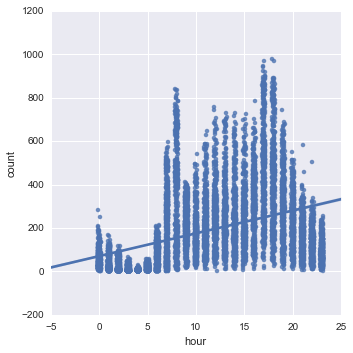

In [24]:
sns.lmplot("hour","count",bike_sharing_demand,x_jitter=.15)

Clearly , there is some kind of non linear relationship between hour of the count and the hour of the day, Lets apply local  weighted regression between the variables to see if it generates a better relationship between the variables.

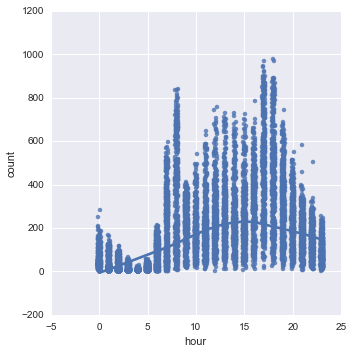

In [25]:
sns.lmplot("hour","count",bike_sharing_demand,x_jitter=.15,lowess=True)

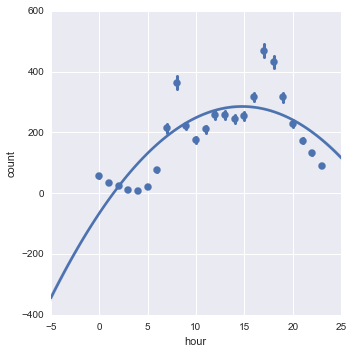

In [26]:
sns.lmplot("hour","count",bike_sharing_demand,x_estimator = np.mean,order =2)

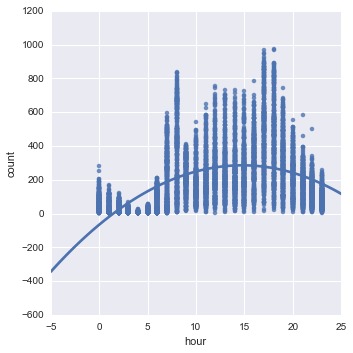

In [11]:
sns.lmplot("hour","count",bike_sharing_demand,order=2)

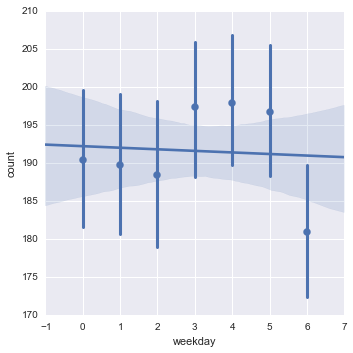

In [14]:
sns.lmplot("weekday","count",bike_sharing_demand,x_jitter=.15,x_estimator = np.mean)

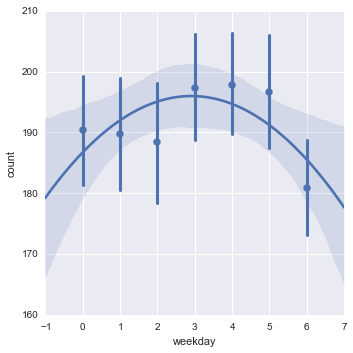

In [27]:
sns.lmplot("weekday","count",bike_sharing_demand,x_jitter=.15,x_estimator = np.mean,order =2)

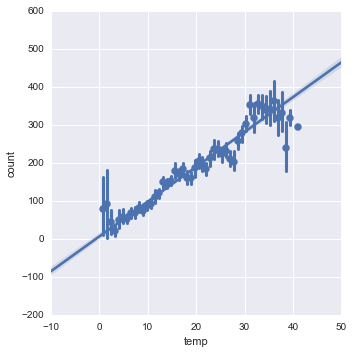

In [30]:
sns.lmplot("temp","count",bike_sharing_demand,x_estimator = np.mean)

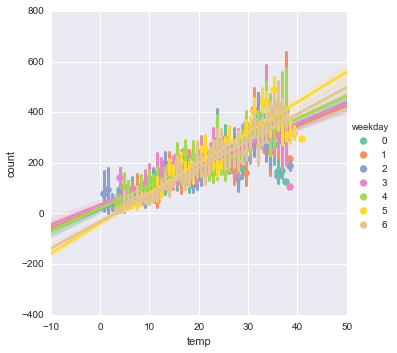

In [37]:
sns.lmplot("temp","count",bike_sharing_demand,x_estimator = np.mean,hue="weekday",palette="Set2")

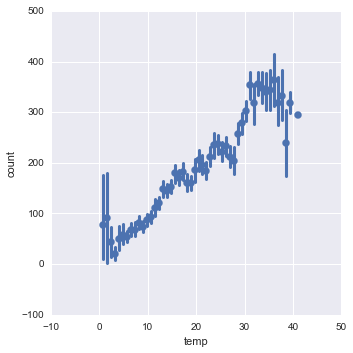

In [40]:
sns.lmplot("temp", "count", bike_sharing_demand,  palette="Set1", fit_reg=False,x_estimator=np.mean);

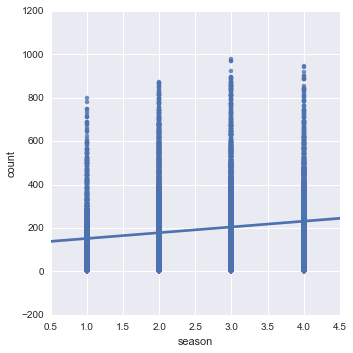

In [43]:
sns.lmplot("season", "count", bike_sharing_demand);

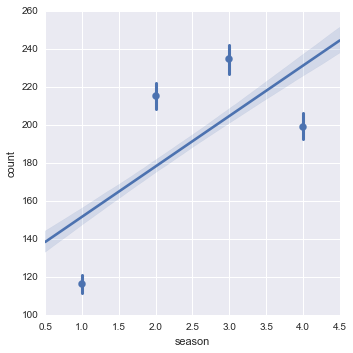

In [44]:
sns.lmplot("season", "count", bike_sharing_demand,x_estimator= np.mean);

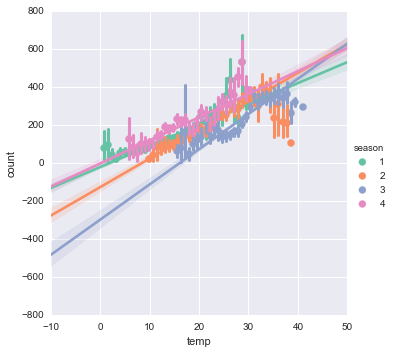

In [45]:
sns.lmplot("temp","count",bike_sharing_demand,x_estimator = np.mean,hue="season",palette="Set2")

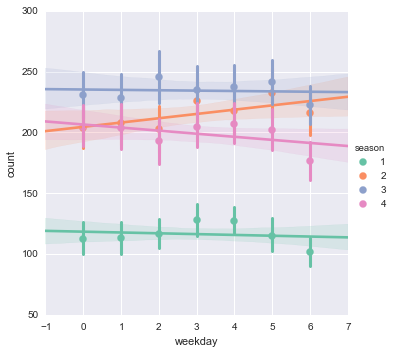

In [46]:
sns.lmplot("weekday","count",bike_sharing_demand,x_estimator = np.mean,hue="season",palette="Set2")

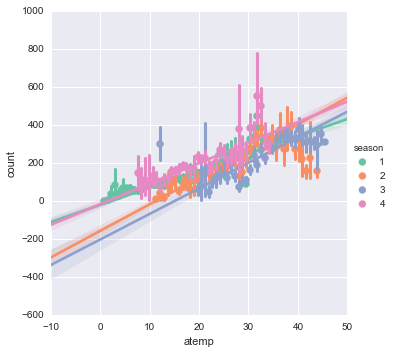

In [47]:
sns.lmplot("atemp","count",bike_sharing_demand,x_estimator = np.mean,hue="season",palette="Set2")

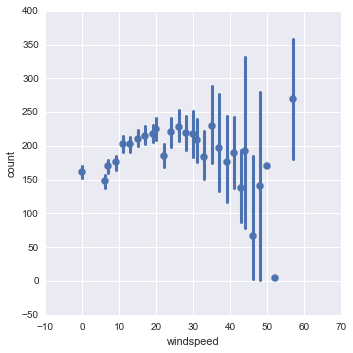

In [49]:
sns.lmplot("windspeed", "count", bike_sharing_demand,fit_reg=False,x_estimator=np.mean);

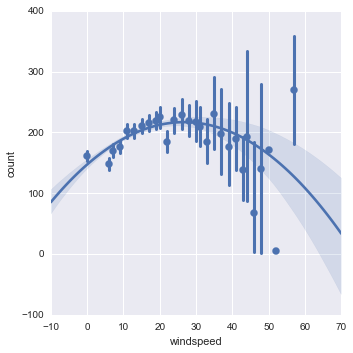

In [50]:
sns.lmplot("windspeed", "count", bike_sharing_demand,x_estimator=np.mean,order=2);

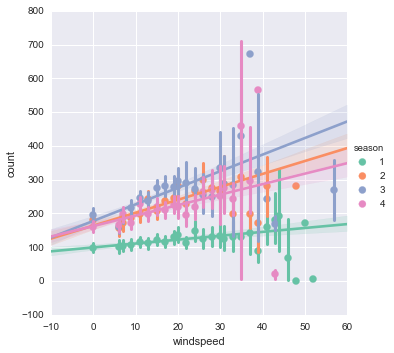

In [51]:
sns.lmplot("windspeed","count",bike_sharing_demand,x_estimator = np.mean,hue="season",palette="Set2")

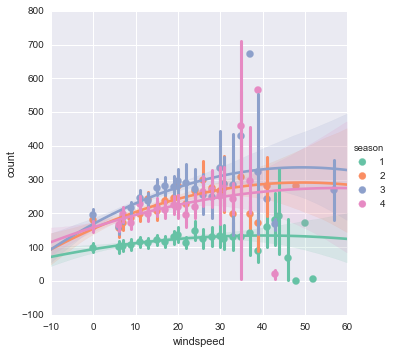

In [52]:
sns.lmplot("windspeed","count",bike_sharing_demand,x_estimator = np.mean,hue="season",palette="Set2",order =2)

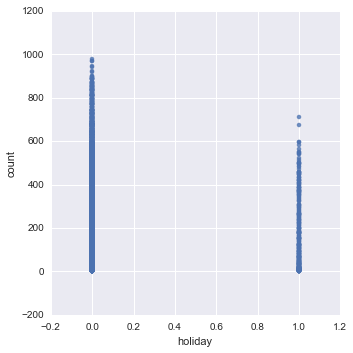

In [55]:
sns.lmplot("holiday", "count", bike_sharing_demand,fit_reg=False);

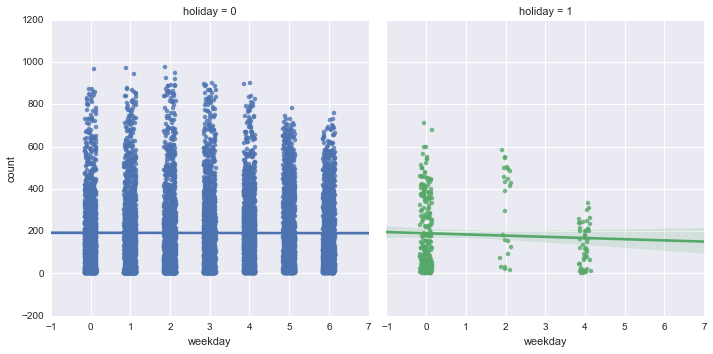

In [57]:
sns.lmplot("weekday","count",bike_sharing_demand,x_jitter=.15,col="holiday",hue="holiday")

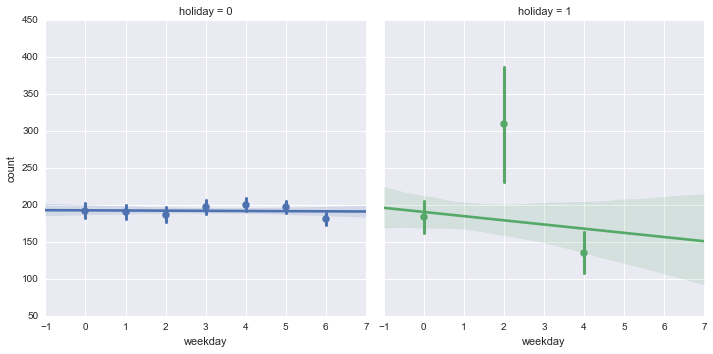

In [58]:
sns.lmplot("weekday","count",bike_sharing_demand,x_jitter=.15,col="holiday",hue="holiday",x_estimator=np.mean)

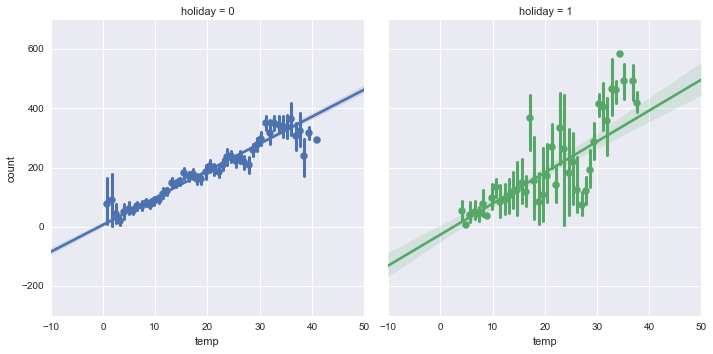

In [59]:
sns.lmplot("temp","count",bike_sharing_demand,x_jitter=.15,col="holiday",hue="holiday",x_estimator=np.mean)

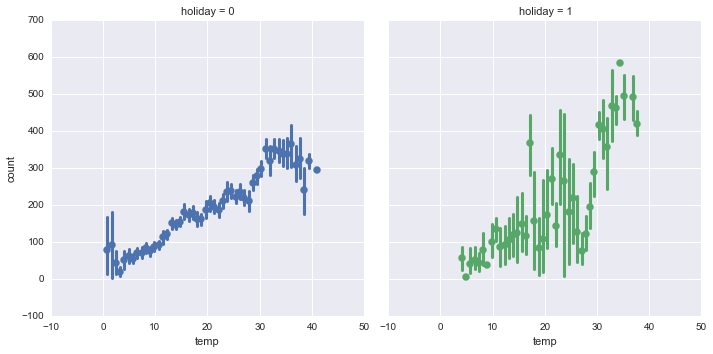

In [60]:
sns.lmplot("temp","count",bike_sharing_demand,x_jitter=.15,col="holiday",hue="holiday",x_estimator=np.mean,fit_reg=False)

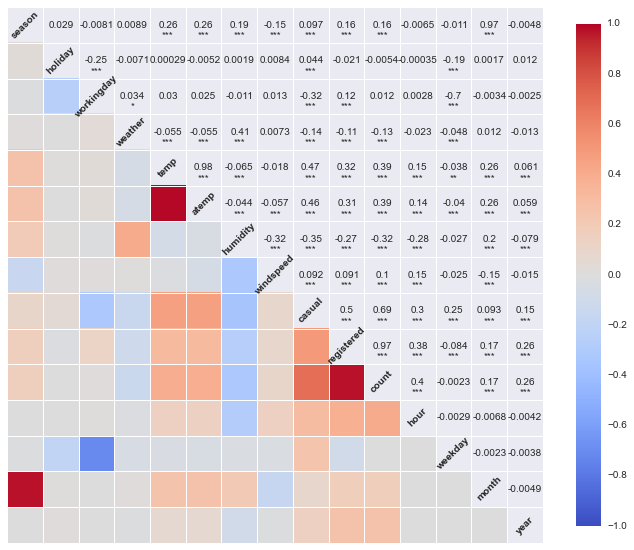

In [63]:
sns.set_context(rc={"figure.figsize": (12, 12)})
sns.corrplot(bike_sharing_demand);